## mount the drive



In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import re # for regular expression
import pandas as pd
import shutil # copying the file
import os
# Set max_colwidth to None to display full content of cells
pd.set_option('display.max_colwidth', None)

In [ ]:
torch.cuda.is_available()

False

## Function to Compute Loss

In [ ]:
import matplotlib.pyplot as plt
def plot_losses(training_losses, validation_losses):
    """
    Plots the training and validation losses over epochs.
  Parameters:
    - training_losses (list): List of training losses for each epoch.
    - validation_losses (list): List of validation losses for each epoch.
    """
    epochs = range(1, len(training_losses) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, training_losses, label='Training Loss')
    plt.plot(epochs, validation_losses, label='Validation Loss')
    plt.title('Training and Validation Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
def plot_acc(training_acc, validation_acc):
    """
    Plots the training and validation losses over epochs.
  Parameters:
    - training_losses (list): List of training losses for each epoch.
    - validation_losses (list): List of validation losses for each epoch.
    """
    epochs = range(1, len(training_acc) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, training_acc, label='Training Acc')
    plt.plot(epochs, validation_acc, label='Validation Acc')
    plt.title('Training and Validation Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

## It is difficult to  read the whole file Instead, read only the first row

In [ ]:
csv_file_path = '/content/drive/MyDrive/Minor-Project/dataset/clean_date_categories.csv'
#only extaracting the category upto 8000 rows
# category_of_news = pd.read_csv(csv_file_path, usecols=['catagory'], nrows=63050)
# Bichar and Sahityarkala
# subset_rows = category_of_news.iloc[5530:5540, category_of_news.columns.get_loc('catagory')]
# subset_rows = category_of_news.iloc[6500:7000, category_of_news.columns.get_loc('catagory')] # Combination of Bichar and Sahityarkala

In [ ]:
# subset_rows = category_of_news.iloc[12430:12746, category_of_news.columns.get_loc('catagory')]
# print(subset_rows)

## Read the content of first row and column with name 'text'

In [ ]:
column_name = 'text'
# Read only the specified column for the nrows number of rows
first_row_text = pd.read_csv(csv_file_path, usecols=[column_name], nrows=63050)
# Read 'Bichar' and 'Sahityarkala' data from row 5600 to 7500
subset_of_text = first_row_text.iloc[5600:5700, first_row_text.columns.get_loc('text')] # Satyasa did on this
#blog_news = first_row_text.iloc[26344:26345, first_row_text.columns.get_loc('text')] # Blog
# blog_news = first_row_text.iloc[26344:26748, first_row_text.columns.get_loc('text')] # Blog
# sampadakiya_news1 = first_row_text.iloc[38090:38910, first_row_text.columns.get_loc('text')] # Sampadakiya set 1
# sampadakiya_news2 = first_row_text.iloc[22750:23330, first_row_text.columns.get_loc('text')] # Sampadakiya set 2

# Concatenate the subsets into one variable
# subset_of_text = pd.concat([blog_news, sampadakiya_news1, sampadakiya_news2], ignore_index=True)
subset_of_text = pd.concat([blog_news], ignore_index=True)

# subset_of_text = first_row_text.iloc[63000:63050, first_row_text.columns.get_loc('text')]
# Remove '\n' from the text column
subset_of_text = subset_of_text.str.replace('\n', ' ')
# Convert subset_of_text to string
subset_of_text_string = subset_of_text.str.cat(sep=' ')
# Remove Non-Nepali characters
subset_of_text_string = re.sub('[A-Za-z]+', ' ', subset_of_text_string)

# Split the string into words
words = subset_of_text_string.split()

print(f"Total number of words: {len(words)}")

# Extract the first 100 words
first_100_words = ' '.join(words[:100])

print(first_100_words)

Total number of words: 878
आज तिम्रो १३ औँ दिनको पुण्यतिथि । देश तिम्रो जुठोबाट मुक्त भएको छ । तर, झुटो बोलेर नागरिकलाई दुःख दिनेहरूबाट भने मुक्त भएको छैन । हुन त मृत्यु वरण गर्ने सबै श्रद्धाञ्जलिका हकदार हुन्छ्न् । तर आफ्नो पार्टीका झिना मसिना कार्यकर्तालाई समवेदना दिने र श्रदाञ्जलि सभा राख्नेहरुले तिम्रालागि दुई शब्दसम्म पनि खर्च गर्न सकेनन्। गरून् पनि कसरी ? अध्याँरो मनले सत्यको उज्यालोको सामना गर्न त्यति सजिलो कहाँ हुन्छ र ? तिमी अब सम्झनामा मात्रै बाँकी भयौ ।अब तिमी छैनौ भन्ने कुराले पीडा त दिन्छ तर नियतिको अगाडि हाम्रो के नै लाग्छ र ? भन्छन्, यो कली युग हो । यहाँ


### Write the string to txt file

In [ ]:
#path where our model will be saved
PATH = '/content/drive/My Drive/Minor-Project/'

### Read the Text File

In [ ]:
# Tokenize Nepali text based on whitespace characters
# this function always return list
nepali_words = re.findall(r'\S+', subset_of_text_string)

### Create Words-to-Index Mapping:

In [ ]:
#set contains unique element
unique_words = list(set(nepali_words))
# word_to_index is a dictionary where every unique word is given a particular index
word_to_index = {word: index for index, word in enumerate(unique_words)}
"""
For each unique word in unique_words, enumerate provides a tuple (index, word).
The dictionary comprehension {word: index for index, word in enumerate(unique_words)} iterates over these tuples,
creating key-value pairs in the dictionary where the word is the key, and the index is the value.
"""

'\nFor each unique word in unique_words, enumerate provides a tuple (index, word).\nThe dictionary comprehension {word: index for index, word in enumerate(unique_words)} iterates over these tuples,\ncreating key-value pairs in the dictionary where the word is the key, and the index is the value.\n'

### Convert Words To Tensors:

In [ ]:
word_tensors = [torch.tensor(word_to_index[word]) for word in nepali_words]

In [ ]:
from collections import Counter

In [ ]:
# Define a PyTorch Dataset class for handling text data
class TextDataset(torch.utils.data.Dataset):
    # Constructor initializes the dataset with arguments (args)
    def __init__(self, args):
        # Store the arguments for later use
        self.args = args
        # Load words from the dataset
        self.words = self.load_words()
        # Get unique words and create mappings
        self.unique_words = self.get_unique_words()

        # Create a mapping from index to word
        self.index_to_word = {index: word for index, word in enumerate(self.unique_words)}
        # Create a mapping from word to index
        self.word_to_index = {word: index for index, word in enumerate(self.unique_words)}

        # Create a list of word indices based on the mappings
        self.word_indexes = [self.word_to_index[w] for w in self.words]

    # Function to load words from a CSV file
    def load_words(self):

        return nepali_words

    # Function to get unique words and their frequencies
    def get_unique_words(self):
        # Use Counter to count the occurrences of each word in the dataset
        word_counts = Counter(self.words)
        # Return a list of unique words, sorted by their frequencies in descending order
        return sorted(word_counts, key=word_counts.get, reverse=True)

    # Function to get the length of the dataset
    def __len__(self):
        # Return the length of the list of word indexes minus the specified args
        return len(self.word_indexes) - self.args

    def __getitem__(self, index):
        return (
            torch.tensor(self.word_indexes[index:index + self.args]),
            torch.tensor(self.word_indexes[index + 1:index + self.args+ 1])
        )

In [ ]:
from torch import nn
class LSTMModel(nn.Module):
    def __init__(self, dataset):
        super(LSTMModel, self).__init__()
        #number of hidden units or neurons in each LSTM layer
        self.lstm_size = 128 # this means hidden size
        self.embedding_dim = 128 # this means input size
        self.num_layers = 3
        # self.num_layers = 2

        n_vocab = len(dataset.unique_words)
        #embedding layer is necessary to convert word into dense vector
        self.embedding = nn.Embedding(
            #how many unique words
            num_embeddings=n_vocab,
            #what dimension of vector will represent the unique words
            embedding_dim=self.embedding_dim,
        )
        self.lstm = nn.LSTM(
            input_size=self.embedding_dim,
            hidden_size=self.lstm_size,
            num_layers=self.num_layers,
            #regularization technique that helps to control overfitting
            dropout=0.2,
        )
        #fully connected layer
        self.fc = nn.Linear(self.lstm_size, n_vocab)

    def forward(self, x, prev_state):
      #applies wrod embedding to input sequence x
        embed = self.embedding(x)
        output, state = self.lstm(embed, prev_state)
        # logits represent how likely each word is to come next in the sequence based on the learned patterns.
        logits = self.fc(output)

        return logits, state
    def accuracy(self, logits, targets):
      #logits return the word with the maximum probability and also its indices
      _, predicted = logits.max(2)
      correct = predicted.eq(targets)
      #.item() is used to convert it to a regular Python scalar
      accuracy = correct.sum().item() / correct.numel()
      return accuracy


    def init_state(self, sequence_length):
        return (
            torch.zeros(self.num_layers,
                        sequence_length, self.lstm_size),
            torch.zeros(self.num_layers,
                        sequence_length, self.lstm_size)
        )

Epoch [1/10], Training Loss: 5.6634, Training Accuracy: 0.0701
Epoch[1/10], Validation Loss: 4.8749, Validation Accuracy: 0.1282, Perplexity : 130.9556
Epoch [2/10], Training Loss: 3.8893, Training Accuracy: 0.2489
Epoch[2/10], Validation Loss: 2.6880, Validation Accuracy: 0.5087, Perplexity : 14.7023
Epoch [3/10], Training Loss: 2.0087, Training Accuracy: 0.5769
Epoch[3/10], Validation Loss: 1.3435, Validation Accuracy: 0.6000, Perplexity : 3.8323
Epoch [4/10], Training Loss: 1.2129, Training Accuracy: 0.6045
Epoch[4/10], Validation Loss: 1.0728, Validation Accuracy: 0.6093, Perplexity : 2.9237
Epoch [5/10], Training Loss: 1.0865, Training Accuracy: 0.6047
Epoch[5/10], Validation Loss: 1.0287, Validation Accuracy: 0.6058, Perplexity : 2.7975
Epoch [6/10], Training Loss: 1.0618, Training Accuracy: 0.6051
Epoch[6/10], Validation Loss: 1.0131, Validation Accuracy: 0.6081, Perplexity : 2.7540
Epoch [7/10], Training Loss: 1.0576, Training Accuracy: 0.6001
Epoch[7/10], Validation Loss: 1.01

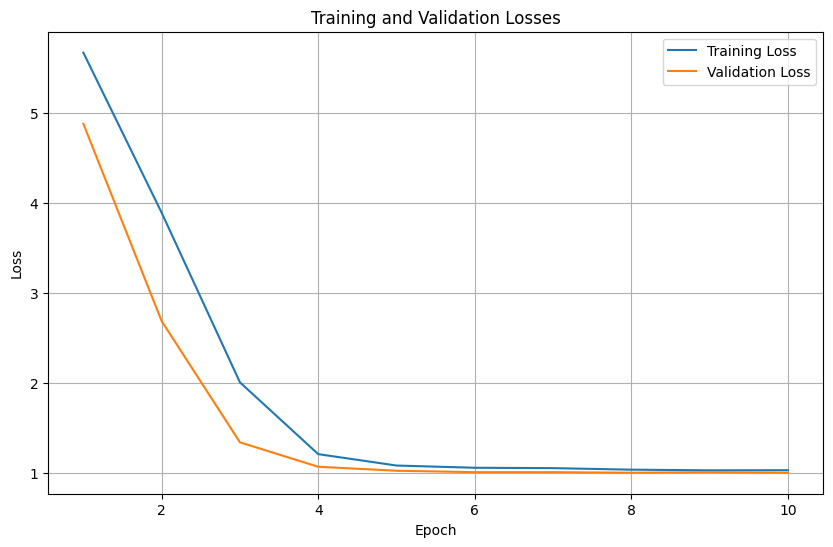

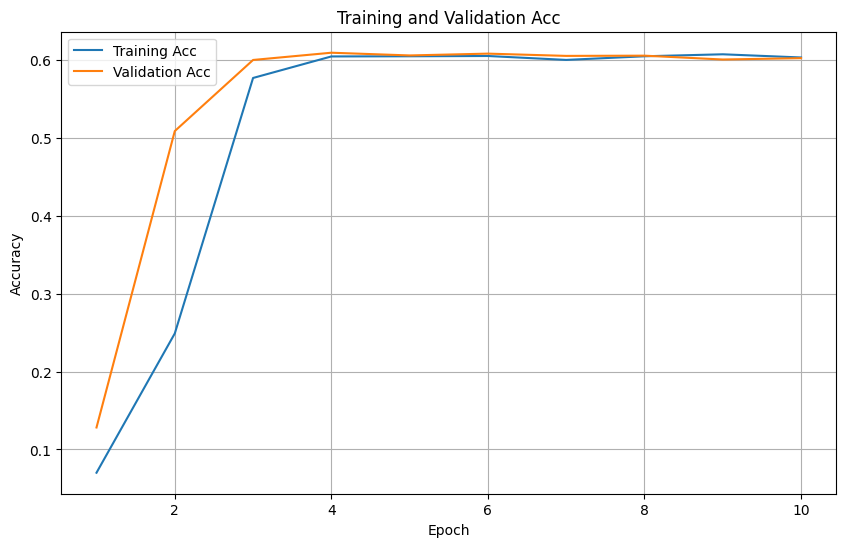

In [ ]:
from torch.utils.data import DataLoader, random_split
import math

# Hyperparameters
sequence_length = 10
batch_size = 64
learning_rate = 0.01
num_epochs = 100

# Create the dataset
dataset = TextDataset(sequence_length)
# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Create the model
model = LSTMModel(dataset)
# model.load_state_dict(torch.load("/content/drive/MyDrive/Minor-Project/epoch-6.pt"))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_train = 0
    total_train = 0

    for batch in train_loader:
        inputs, targets = batch
        # Move inputs and targets to CUDA
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()

        hidden = model.init_state(sequence_length)
        # Move each tensor in the tuple to CUDA
        hidden = tuple(h.to(device) for h in hidden)

        outputs, _ = model(inputs, hidden)

        loss = criterion(outputs.view(-1, len(dataset.unique_words)), targets.view(-1))
        loss.backward()

        optimizer.step()

        total_loss += loss.item()

        # Calculate accuracy for each batch
        accuracy_train = model.accuracy(outputs, targets)
        total_train += inputs.size(0) * inputs.size(1)
        correct_train += accuracy_train * inputs.size(0) * inputs.size(1)

    # Calculate average loss for the epoch
    average_loss = total_loss / len(train_loader)
    train_losses.append(average_loss)

    # Calculate average accuracy
    accuracy_train = correct_train / total_train
    train_accuracies.append(accuracy_train)

    # Print the epoch, average loss, and accuracy
    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {average_loss:.4f}, Training Accuracy: {accuracy_train:.4f}")

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for batch in val_loader:
            inputs, targets = batch
            # Move inputs and targets to CUDA
            inputs, targets = inputs.to(device), targets.to(device)

            hidden = model.init_state(sequence_length)
            # Move each tensor in the tuple to CUDA
            hidden = tuple(h.to(device) for h in hidden)
            outputs, _ = model(inputs, hidden)

            loss = criterion(outputs.view(-1, len(dataset.unique_words)), targets.view(-1))
            val_loss += loss.item()

            # Calculate accuracy for each batch
            accuracy_val = model.accuracy(outputs, targets)
            total_val += inputs.size(0) * inputs.size(1)
            correct_val += accuracy_val * inputs.size(0) * inputs.size(1)

    # Calculate average validation loss for the epoch
    average_val_loss = val_loss / len(val_loader)
    val_losses.append(average_val_loss)

    # Calculate perplexity
    perplexity = math.exp(average_val_loss)

    # Calculate average validation accuracy
    accuracy_val = correct_val / total_val
    val_accuracies.append(accuracy_val)

    # Save the model after each epoch
    if (epoch > 0 and epoch % 5 == 0):
      FULL_MODEL_PATH = f"{PATH}diff-size-trial-epoch-{epoch+1}.pt"
      torch.save(model.state_dict(), FULL_MODEL_PATH)

    # Print the epoch, average validation loss, and accuracy
    print(f"Epoch[{epoch+1}/{num_epochs}], Validation Loss: {average_val_loss:.4f}, Validation Accuracy: {accuracy_val:.4f}, Perplexity : {perplexity:.4f}")


plot_losses(train_losses, val_losses)
plot_acc(train_accuracies,val_accuracies)



Epoch [1/40], Training Loss: 8.0113, Training Accuracy: 0.0873
Epoch[1/40], Validation Loss: 7.3863, Validation Accuracy: 0.1068, Perplexity : 1613.6647

Epoch [2/40], Training Loss: 7.2299, Training Accuracy: 0.1111
Epoch[2/40], Validation Loss: 6.9064, Validation Accuracy: 0.1203, Perplexity : 998.6206

Epoch [3/40], Training Loss: 6.9329, Training Accuracy: 0.1182
Epoch[3/40], Validation Loss: 6.6683, Validation Accuracy: 0.1247, Perplexity : 787.0200

Epoch [4/40], Training Loss: 6.7680, Training Accuracy: 0.1214
Epoch[4/40], Validation Loss: 6.5048, Validation Accuracy: 0.1279, Perplexity : 668.3377

Epoch [5/40], Training Loss: 6.6499, Training Accuracy: 0.1237
Epoch[5/40], Validation Loss: 6.3821, Validation Accuracy: 0.1302, Perplexity : 591.1677

Epoch [6/40], Training Loss: 6.5632, Training Accuracy: 0.1253
Epoch[6/40], Validation Loss: 6.2882, Validation Accuracy: 0.1316, Perplexity : 538.1910

Epoch [7/40], Training Loss: 6.4933, Training Accuracy: 0.1266
Epoch[7/40], Validation Loss: 6.2097, Validation Accuracy: 0.1338, Perplexity : 497.5383

Epoch [8/40], Training Loss: 6.4335, Training Accuracy: 0.1278
Epoch[8/40], Validation Loss: 6.1378, Validation Accuracy: 0.1356, Perplexity : 463.0272


In [ ]:
plot_losses(train_losses, val_losses)
plot_acc(train_accuracies,val_accuracies)

NameError: name 'plot_losses' is not defined

In [ ]:
sequence_length = 10
dataset = TextDataset(sequence_length)
model = LSTMModel(dataset)
# torch.load with map_location=torch.device('cpu')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load("/content/drive/MyDrive/Minor-Project/epoch-7.pt",map_location=torch.device(device)))

In [ ]:
input_sentence = "समाजको सोच विकृति, विसङ्गति सफा गर्ने असल नेता गुमाएको छ । तिमी यो समाज र राज्यलाई सही मार्गतर्फ डोर्‍याउन । तिमी"
# input_sentence = "समाजको सोच मरेपछि फालिहाल्नुपर्छ भन्ने हुँदोरहेछ । यत्रो वर्षसम्म एउटा सन्तान र पिताको भावनात्मक सम्बन्ध सेयरकाे सट्टा भोट दिएको भए आज सायद देशकाे हालत अलि फरक हुन्थ्यो कि थिएनौ मलाई थाहा भएन । तिमी यो समाज र ? यसले प्रष्ट हुन्छ यहाँ त मृत्यु "

input_indexes = [dataset.word_to_index[word] for word in input_sentence.split() if word in dataset.word_to_index]

# model.load_state_dict(torch.load("/content/drive/MyDrive/Minor-Project/epoch-1.pt"))
# Initialize hidden state
hidden = model.init_state(1)
model.eval()

# Process each word in the input sentence sequentially
for input_index in input_indexes:
    # Convert input_index to tensor
    input_tensor = torch.tensor([[input_index]], dtype=torch.long)

    # Forward pass through the model
    outputs, hidden = model(input_tensor, hidden)

print(outputs.size())
# Get the predicted index of the next word

predicted_index = torch.argmax(outputs[0, -1, :]).item()
predicted_word = dataset.index_to_word[predicted_index]

# Print the predicted word
print("Input Sentence:", input_sentence)
print("Predicted Next Word:", predicted_word)

torch.Size([1, 1, 502])
Input Sentence: समाजको सोच विकृति, विसङ्गति सफा गर्ने असल नेता गुमाएको छ । तिमी यो समाज र राज्यलाई सही मार्गतर्फ डोर्‍याउन । तिमी
Predicted Next Word: यो
